In [1]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import odf
import math
import pdfkit
from scipy.stats import linregress
from scipy.integrate import simps
import scipy.constants as const
from itertools import chain
from statistics import mean
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.umath import *
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, minimize_scalar
from lmfit.models import LorentzianModel
from IPython.display import display, Latex
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
B_correct =  -0.4 #mT
d_start = 46.5
# B values in mT
# all values of B in minus
# higher fluctuations in B for centered position

In [2]:
d = np.arange(46.5, 86, 5)
I_1 = [0, 0.51, 1.01, 1.51, 2.02, 2.53, 3.01, 3.54, 4.04]
B = [[0.3, 0.5, 1.1, 1.4, 1.4, 1.3, 0.7, 0.3], 
     [1.6, 7.3, 26.5, 33.7, 33.9, 31.4, 14.2, 2.9],
     [2.1, 13.0, 53.5, 66.0, 65.0, 62.8, 25, 5.1],
     [3.2, 19.5, 78.2, 102, 101, 92, 38, 7.5],
     [4, 29.1, 113, 134, 133.5, 124, 50.7, 10.4],
     [5.2, 38.3, 139.4, 167, 166.5, 150.3, 60.1, 11.9],
     [7.3, 41.8, 157.5, 192.5, 193.7, 175.4, 72.4, 14.7],
     [9.7, 47.6, 174.7, 214.4, 215.5, 198.0, 74.1, 12.7],
     [7.6, 58.0, 183.7, 231, 230.7, 214.2, 76.4, 12.0]
    ]

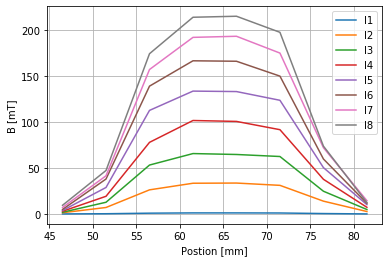

In [3]:
for i in range(8):
    plt.plot(d, B[i][:])
plt.legend(['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8'])
plt.xlabel('Postion [mm]')
plt.ylabel('B [mT]')
plt.grid()
plt.show()

In [4]:
mean_arr = []
for i in range(9):
    integrate = simps(B[i][:], d)
    mean = integrate/(d[len(d)-1] - d[0])
    mean_arr.append(mean)

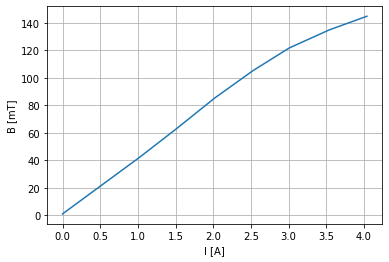

In [5]:
plt.plot(I_1, mean_arr)
plt.xlabel('I [A]')
plt.ylabel('B [mT]')
plt.grid()
plt.show()

In [6]:
# current values drop by around 0.05 - 0.1 A for larger values
wavelength = [595, 580, 525, 505, 440] 
I_2 = [[0.50, 1.00, 1.51, 2.03, 2.51, 3.02, 3.52, 3.99],
     [0.49, 1.00, 1.48, 1.96, 2.54, 3.00, 3.46, 3.91],
     [0.51, 1.01, 1.52, 2.04, 2.49, 2.90, 3.48, 3.92],
     [0.47, 0.99, 1.48, 2.12, 2.50, 2.94, 3.42, 3.98],
     [0.45, 1.07, 1.52, 2.05, 2.45, 2.94, 3.48, 3.93],
    ]
# values less than least count !?
angle1 = [[43.5, 42.5, 42, 41.5, 41, 40, 40, 39],
         [43.5, 43, 41.5, 41, 40, 39.5, 39, 38.5],
          [43.5, 43, 41, 40, 39, 37, 37.5, 37],
          [43.5, 42.5, 41, 39.5, 39, 38, 37, 37],
          [42.5, 41, 39.5, 37, 36, 35, 34, 31.5]
        ] # Position 1
angle2 = [[45, 46, 46.5, 47.5, 48, 48, 49, 50],
          [45, 46.5, 47, 48, 49, 49.5, 50, 50],
          [46, 46.5, 48, 49.5, 50, 51, 52, 52],
          [45, 46, 48, 50, 50, 51, 51, 52.5],
          [46.5, 48.5, 50, 52.5, 53, 55, 56.5, 57]
         ]# Position 2 ie polarity of current changed

In [7]:
# Interpolation work
interpolation_arr = []
for i in range(len(wavelength)):
    interpolation = np.interp(I_2[i][:], I_1, mean_arr)
    interpolation_arr.append(interpolation)
interpolation_arr

[array([ 21.12068161,  41.23580952,  62.85      ,  85.67065826,
        104.49082633, 121.95932165, 134.33016622, 143.7725    ]),
 array([ 20.71755369,  41.23580952,  61.57728571,  82.63991597,
        105.61743552, 121.36946925, 132.84566487, 142.18183333]),
 array([ 21.52380952,  41.63809524,  63.28977591,  86.0627451 ,
        103.70665266, 117.94511409, 133.34049865, 142.38066667]),
 array([ 19.91129785,  40.83352381,  61.57728571,  89.19943978,
        104.0987395 , 119.31485615, 131.8559973 , 143.57366667]),
 array([ 19.10504202,  44.18352381,  63.28977591,  86.45483193,
        102.13830532, 119.31485615, 133.34049865, 142.5795    ])]

In [8]:
angle_rotation = []
for i in range(len(I_2)):
    angle_ = (np.array(angle2[i][:]) - np.array(angle1[i][:]))
    angle_rotation.append(angle_)
angle_rotation

[array([ 1.5,  3.5,  4.5,  6. ,  7. ,  8. ,  9. , 11. ]),
 array([ 1.5,  3.5,  5.5,  7. ,  9. , 10. , 11. , 11.5]),
 array([ 2.5,  3.5,  7. ,  9.5, 11. , 14. , 14.5, 15. ]),
 array([ 1.5,  3.5,  7. , 10.5, 11. , 13. , 14. , 15.5]),
 array([ 4. ,  7.5, 10.5, 15.5, 17. , 20. , 22.5, 25.5])]

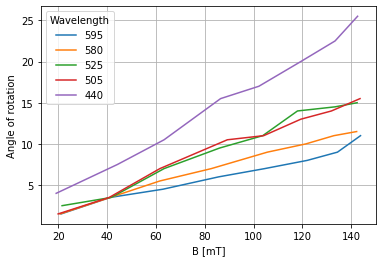

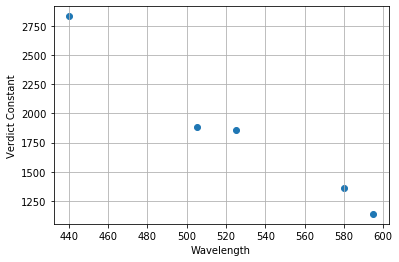

In [9]:
verdict_const_arr = []
for i in range(len(wavelength)):
    y = angle_rotation[i]
    x = interpolation_arr[i]
    X = np.array(x).reshape(-1, 1)
    Y = np.array(y).reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    intercept = reg.intercept_
    coef = reg.coef_
    reg_value = reg.score(X, Y)
    verdict_const = (coef[0, 0]/(2 * 0.03)) * 1000
    verdict_const_arr.append(verdict_const)
plt.plot(interpolation_arr[0][:], angle_rotation[0][:], 
         interpolation_arr[1][:], angle_rotation[1][:],
         interpolation_arr[2][:], angle_rotation[2][:],
         interpolation_arr[3][:], angle_rotation[3][:],
         interpolation_arr[4][:], angle_rotation[4][:])
plt.legend([595, 580, 525, 505, 440], title="Wavelength")
plt.xlabel('B [mT]')
plt.ylabel('Angle of rotation')
plt.grid()
plt.show()
plt.scatter(wavelength, verdict_const_arr)
plt.xlabel('Wavelength')
plt.ylabel('Verdict Constant')
plt.grid()
plt.show()

In [10]:
verdict_const_arr

[1139.013495856664,
 1364.230019377424,
 1860.5910477692935,
 1882.5298685880311,
 2832.92947077062]

## Kerr Effect

In [11]:
background = 0.01
amplification = 10
maximum = 1.85 # in V
final_background = 0.06

In [12]:
# slight fluctuations were observed
# dimension of these two arrays where found to be 26 and 24 at certain point in time
voltage = [58, 96, 209, 300, 405, 459, 500, 536, 576, 616, 646, 679, 705, 736, 762, 795, 830, 870, 891, 916, 945, 980, 1009, 1030, 1054, 1089, 1125, 1160]
intensity = [0, 0, 0, 0, 0.01, 0, 0.04, 0.09, 0.18, 0.31, 0.43, 0.61, 0.81, 1.07, 1.28, 1.46, 1.67, 1.78, 1.77, 1.73, 1.61, 1.41, 1.17, 0.96, 0.71, 0.39, 0.15, 0.15]
print(len(voltage), len(intensity))

28 28


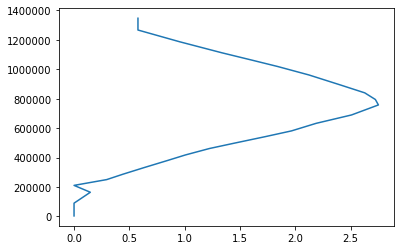

In [13]:
phase_shift_arr = []
for i in range(len(intensity)):
    phase_shift = 2 * np.arcsin(np.sqrt(intensity[i]/maximum))
    phase_shift_arr.append(phase_shift)
voltage_sq = [i**2 for i in voltage]
plt.plot(phase_shift_arr, voltage_sq)

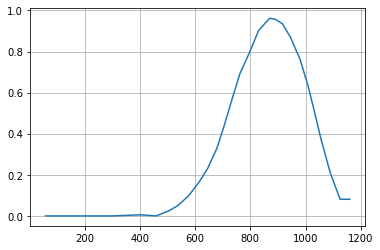

In [14]:
y_arr = []
for i in range(len(intensity)):
    y = (intensity[i])/maximum
    y_arr.append(y)
x = voltage
plt.plot(x, y_arr)
plt.grid()
plt.show()

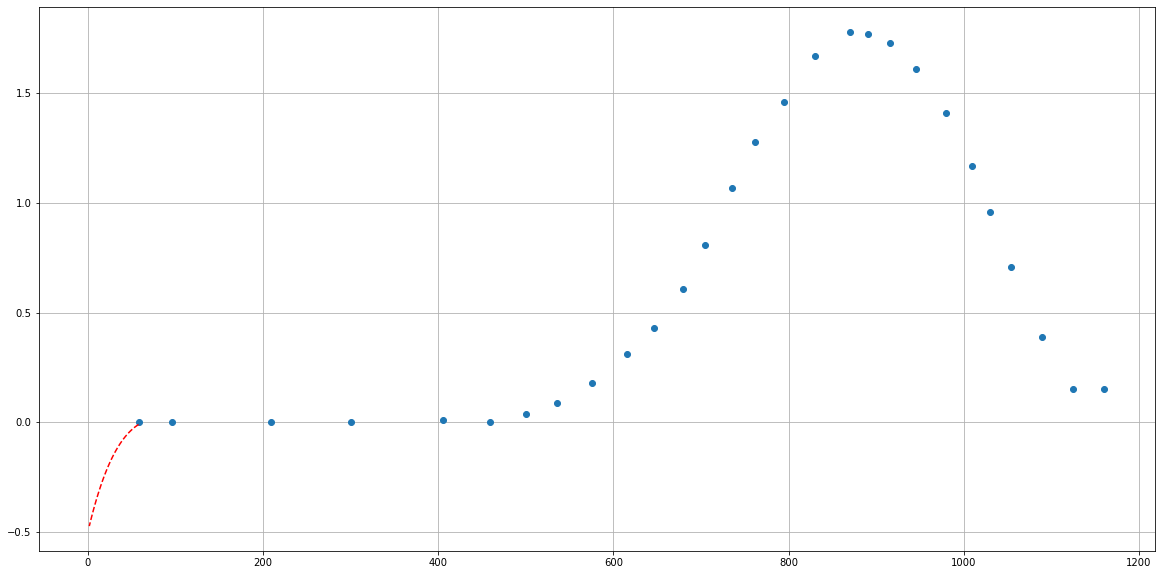

In [15]:
def linelikeexcel(x,y):
    coefs = np.polyfit(x,y,deg=8)
    p_obj = np.poly1d(coefs)
    return p_obj

p_objt = linelikeexcel(np.array(voltage), np.array(intensity))

x_line = np.linspace(min(np.array(voltage)), max(np.array(intensity)), 100)
y_linet = p_objt(x_line)

plt.figure(figsize=(20,10))
plt.plot(np.array(voltage), np.array(intensity), 'o')
plt.plot(x_line,y_linet, 'r--')

plt.grid()
plt.show()